# **Import Lib**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import neighbors,datasets,preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import math


# **Import Data**

In [6]:
data = pd.read_csv("diamonds.csv")
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,3,3,8,326,3.95,3.98,2.43
1,0.21,4,6,4,3,6,326,3.89,3.84,2.31
2,0.23,2,6,6,1,4,327,4.05,4.07,2.31
3,0.29,4,2,5,3,8,334,4.20,4.23,2.63
4,0.31,2,1,3,2,8,335,4.34,4.35,2.75


# **Check Data**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  int64  
 5   table    53940 non-null  int64  
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 4.1 MB


# **Relation of Data**

In [8]:
# sns.pairplot(data)

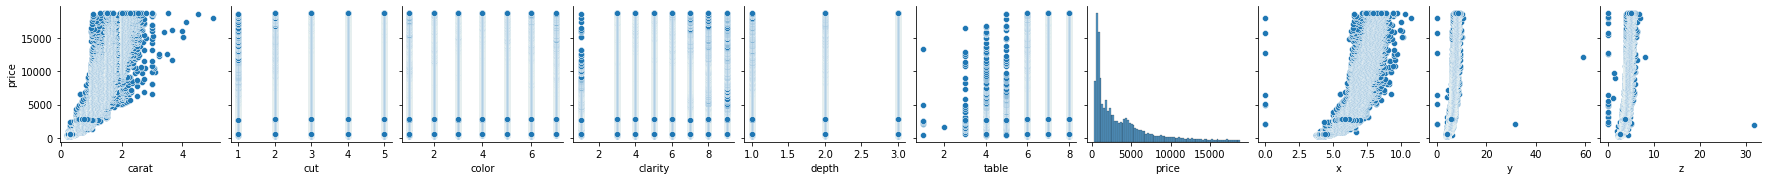

In [9]:
sns.pairplot(data,x_vars=data.columns,y_vars=["price"])

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

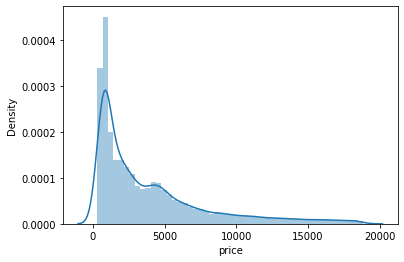

In [10]:
sns.distplot(data["price"])

## covarian matrix and correlation

In [12]:
#Covarian Matrix
carat_minus_bar = data["carat"]-data["carat"].mean()
cut_minus_bar = data["cut"]-data["cut"].mean()
color_minus_bar = data["color"]-data["color"].mean()
clarity_minus_bar = data["clarity"]-data["clarity"].mean()
depth_minus_bar = data["depth"]-data["depth"].mean()
table_minus_bar = data["table"]-data["table"].mean()
price_minus_bar = data["price"]-data["price"].mean()
x_minus_bar = data["x"]-data["x"].mean()
y_minus_bar = data["y"]-data["y"].mean()
z_minus_bar = data["z"]-data["z"].mean()

x_mat = np.array([carat_minus_bar,cut_minus_bar,color_minus_bar,clarity_minus_bar,depth_minus_bar,table_minus_bar,price_minus_bar,x_minus_bar,y_minus_bar,z_minus_bar])
cov_mat = (x_mat.dot(x_mat.T))/len(data)
for i in cov_mat:
    for j in i:
        print("{:14,.4f}".format(j),end=" ")
    print()

        0.2247        -0.0714        -0.2350        -0.2822        -0.0229        -0.0448     1,742.7331         0.5185         0.5152         0.3189 
       -0.0714         1.2468         0.0390         0.3607         0.3627         0.3098      -238.2755        -0.1573        -0.1549        -0.1177 
       -0.2350         0.0390         2.8937        -0.0658         0.0185         0.0292    -1,170.7159        -0.5158        -0.5121        -0.3220 
       -0.2822         0.3607        -0.0658         2.8104         0.1347         0.1505      -964.5088        -0.7015        -0.6877        -0.4357 
       -0.0229         0.3627         0.0185         0.1347         0.2633         0.0271       -37.2750        -0.0433        -0.0387        -0.0455 
       -0.0448         0.3098         0.0292         0.1505         0.0271         0.5104      -239.1625        -0.1159        -0.1097        -0.0515 
    1,742.7331      -238.2755    -1,170.7159      -964.5088       -37.2750      -239.1625 15,9

In [13]:
data.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.355074,-0.094138,-0.132439,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.192692,0.633026,0.388391,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.023079,0.021169,0.023991,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.355074,0.192692,-0.023079,1.000000,0.156614,0.125675,-0.144217,-0.373021,-0.359150,-0.368309
depth,-0.094138,0.633026,0.021169,0.156614,1.000000,0.073994,-0.018208,-0.075285,-0.066071,-0.125513
table,-0.132439,0.388391,0.023991,0.125675,0.073994,1.000000,-0.083917,-0.144572,-0.134433,-0.102230
price,0.921591,-0.053491,-0.172511,-0.144217,-0.018208,-0.083917,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.373021,-0.075285,-0.144572,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.359150,-0.066071,-0.134433,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.368309,-0.125513,-0.102230,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:>

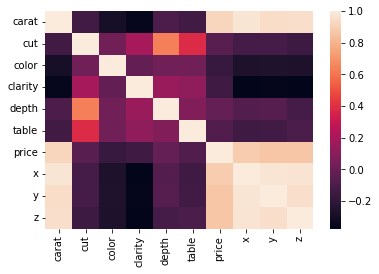

In [14]:
sns.heatmap(data.corr())

# **Start Model**

## sort correlation

In [15]:
#check relation about "price"
data.corr().sort_values("price")["price"]

color     -0.172511
clarity   -0.144217
table     -0.083917
cut       -0.053491
depth     -0.018208
z          0.861249
y          0.865421
x          0.884435
carat      0.921591
price      1.000000
Name: price, dtype: float64

# First Model

## Select data

In [149]:
#select data
X = data[["carat","x"]]
y = data["price"]


## Create model

In [150]:
#create model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_test

46519     1781
8639      4452
23029      631
51641      544
25789    14775
         ...  
26078    15308
26584    16300
35767      912
29891      710
41204     1205
Name: price, Length: 10788, dtype: int64

In [151]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

## Get result

In [152]:
print(f"coef[1] = {lm.coef_[0]} coef[2] = {lm.coef_[1]}")
print(f"intercept = {lm.intercept_}")

coef[1] = 4800.854555276829 coef[2] = -1154.9507769457741
intercept = 3925.486257879124


## Check RMSE

In [153]:
y_predicted = lm.predict(X_test)
rmse = mean_squared_error(y_test,y_predicted,squared=False)
mape = mean_absolute_percentage_error(y_test,y_predicted)
print(mape)

0.2799537170978843


## Test First Model 

In [154]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,4,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,6,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,3,63.3,58.0,335,4.34,4.35,2.75


In [155]:
y_hat = []
for i in range(len(data)):
    y=lm.coef_[0]*data["carat"][i]+lm.coef_[1]*data["x"][i]+lm.intercept_
    y=int(y)
    y_hat.append(y)
data["y_predicted"]=y_hat
data.tail(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,y_predicted
53930,0.71,4,6,4,60.5,55.0,2756,5.79,5.74,3.49,646
53931,0.71,4,5,4,59.8,62.0,2756,5.74,5.73,3.43,704
53932,0.70,3,6,5,60.5,59.0,2757,5.71,5.76,3.47,691
53933,0.70,3,6,5,61.2,59.0,2757,5.69,5.72,3.49,714
53934,0.72,4,7,4,62.7,59.0,2757,5.69,5.73,3.58,810
53935,0.72,5,7,4,60.8,57.0,2757,5.75,5.76,3.50,741
53936,0.72,2,7,4,63.1,55.0,2757,5.69,5.75,3.61,810
53937,0.70,3,7,4,62.8,60.0,2757,5.66,5.68,3.56,749
53938,0.86,4,3,3,61.0,58.0,2757,6.15,6.12,3.74,951
53939,0.75,5,7,3,62.2,55.0,2757,5.83,5.87,3.64,792


## Rsquare & Pearson

In [156]:
ssr = []
sst = [1]
ymean = data["price"].mean()
print(ymean)
for i in range(len(data)):
    b = (data["y_predicted"][i] - ymean)**2
    a = (data["price"][i] - ymean)**2
    ssr.append(b)
    sst.append(a)
ssr=sum(ssr)
sst=sum(sst)
rsqaure=ssr/sst
rsqaure


3932.799721913237


0.5608587250115896

In [157]:
vecU = data["price"]-data["price"].mean()
vecV = data["y_predicted"]-data["y_predicted"].mean()
vecUnp=np.array(vecU)
vecVnp=np.array(vecV)

dd=vecUnp.dot(vecVnp)
sum_u=0
sum_v=0
for i in range(len(data)):
    sum_u+=vecU[i]**2
    sum_v+=vecV[i]**2
sc_vecU=math.sqrt(sum_u)
sc_vecV=math.sqrt(sum_v)
pearson=dd/(sc_vecU*sc_vecV)
pearson

0.9040546566342154

In [158]:
data.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z,y_predicted
carat,1.000000,-0.134967,-0.291437,-0.355074,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.961997
cut,-0.134967,1.000000,0.020519,0.192692,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323,-0.137273
color,-0.291437,0.020519,1.000000,-0.023079,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227,-0.297463
clarity,-0.355074,0.192692,-0.023079,1.000000,-0.071840,-0.160630,-0.144217,-0.373021,-0.359150,-0.368309,-0.308600
depth,0.028224,-0.218055,-0.047279,-0.071840,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.092170
table,0.181618,-0.433405,-0.026465,-0.160630,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.152247
price,0.921591,-0.053491,-0.172511,-0.144217,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.904055
x,0.975094,-0.125565,-0.270287,-0.373021,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.877476
y,0.951722,-0.121462,-0.263584,-0.359150,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.858081
z,0.953387,-0.149323,-0.268227,-0.368309,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.866520


# Second Model

In [159]:
#second model
#Least Square Estimation
#least mean square

sig_xp2=0
sig_xz=0
sig_x=sum(data["carat"])
sig_zp2=0
sig_z=sum(data["x"])
N=len(data)
sig_xy=0
sig_zy=0
sig_y=sum(data["price"])
for i in range(len(data)):
    sig_xp2+=data["carat"][i]**2
    sig_zp2+=data["x"][i]**2
    sig_xy+=data["carat"][i]*data["price"][i]
    sig_xz+=data["carat"][i]*data["x"][i]
    sig_zy+=data["x"][i]*data["price"][i]

co_mtx=np.array([ [sig_xp2,sig_xz,sig_x],[sig_xz,sig_zp2,sig_z],[sig_x,sig_z,N] ])
ans_mtx=np.array([ [sig_xy],[sig_zy],[sig_y] ])
print(co_mtx)



# zeta2 = 10125.997449775457978
# zeta1 = -1026.8596838629419674
# zeta0 = 1737.9581525196355441


[[  46463.39469999  274640.508        43040.87      ]
 [ 274640.508      1839596.01960004  309138.61999999]
 [  43040.87        309138.61999999   53940.        ]]


## Cramer's rule find zeta

In [160]:
#Cramer
temp_mtx=np.array([x for x in co_mtx])
det_comtx=np.linalg.det(co_mtx)
varr2=sig_xy
varr1=sig_zy
varr0=sig_y
zeta=[]
for i in range(3):
    temp_mtx[0][i]=varr2
    temp_mtx[1][i]=varr1
    temp_mtx[2][i]=varr0
    det_tempmtx=np.linalg.det(temp_mtx)
    zeta.append(det_tempmtx/det_comtx)
    temp_mtx=np.array([x for x in co_mtx])
print(zeta)

[10125.987670900531, -1026.8568541721115, 1737.9497380698292]


## Test second model

In [161]:
#Least Square Estimation
#least mean square
y_hat2=[]
for i in range(len(data)):
    y2=10125.997449775457978*data["carat"][i]-1026.8596838629419674*data["x"][i]+1737.9581525196355441
    y2=int(y2)
    y_hat2.append(y2)
data["y_predicted2"]=y_hat2
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,y_predicted,y_predicted2
0,0.23,5,6,3,61.5,55.0,326,3.95,3.98,2.43,467,10
1,0.21,4,6,4,59.8,61.0,326,3.89,3.84,2.31,440,-130
2,0.23,2,6,6,56.9,65.0,327,4.05,4.07,2.31,352,-91
3,0.29,4,2,5,62.4,58.0,334,4.20,4.23,2.63,466,361
4,0.31,2,1,3,63.3,58.0,335,4.34,4.35,2.75,401,420
5,0.24,3,1,7,62.8,57.0,336,3.94,3.96,2.48,527,122
6,0.24,3,2,8,62.3,57.0,336,3.95,3.98,2.47,515,112
7,0.26,3,3,4,61.9,55.0,337,4.07,4.11,2.53,473,191
8,0.22,1,6,5,65.1,61.0,337,3.87,3.78,2.49,512,-8
9,0.23,3,3,6,59.4,61.0,338,4.00,4.05,2.39,409,-40


## Pearson & Rsquare

In [162]:
vecU2 = data["price"]-data["price"].mean()
vecV2 = data["y_predicted2"]-data["y_predicted2"].mean()

vecUnp2 = np.array(vecU2)
vecVnp2 = np.array(vecV2)
dd2 = vecUnp2.dot(vecVnp2)

sum_u2 = 0
sum_v2 = 0
for i in range(len(data)):
    sum_u2 += vecU2[i]**2
    sum_v2 += vecV2[i]**2
sc_vecU2 = math.sqrt(sum_u2)
sc_vecV2 = math.sqrt(sum_v2)
pearson2 = dd2/(sc_vecU2*sc_vecV2)
pearson2

0.9238136636405908

In [163]:
ssr = []
sst = []
ymean = data["price"].mean()
print(ymean)
for i in range(len(data)):
    b = (data["y_predicted2"][i]-ymean)**2
    a = (data["price"][i]-ymean)**2
    ssr.append(b)
    sst.append(a)
ssr = sum(ssr)
sst = sum(sst)
rsqaure = ssr/sst
rsqaure

3932.799721913237


0.8534308238003104

In [164]:
data.head(10)
data.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z,y_predicted,y_predicted2
carat,1.000000,-0.134967,-0.291437,-0.355074,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.961997,0.997594
cut,-0.134967,1.000000,0.020519,0.192692,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323,-0.137273,-0.136531
color,-0.291437,0.020519,1.000000,-0.023079,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227,-0.297463,-0.295078
clarity,-0.355074,0.192692,-0.023079,1.000000,-0.071840,-0.160630,-0.144217,-0.373021,-0.359150,-0.368309,-0.308600,-0.345847
depth,0.028224,-0.218055,-0.047279,-0.071840,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.092170,0.044661
table,0.181618,-0.433405,-0.026465,-0.160630,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.152247,0.175477
price,0.921591,-0.053491,-0.172511,-0.144217,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.904055,0.923814
x,0.975094,-0.125565,-0.270287,-0.373021,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.877476,0.957374
y,0.951722,-0.121462,-0.263584,-0.359150,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.858081,0.934842
z,0.953387,-0.149323,-0.268227,-0.368309,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.866520,0.938239
